# RA2CE basics: setting up an origin-destination analysis

This notebook contains instructions on how to set up an **origin-destination analysis** of the RA2CE model. As usual, it requires the right folder setup, and the correct settings in the configuration files (network.ini and analyses.ini).


First of all, we will import the packages we need to execute the notebook:

In [ ]:
import geopandas as gpd
from pathlib import Path

Import the RA2CE Handler

In [ ]:
from ra2ce.ra2ce_handler import Ra2ceHandler #import the ra2cehandler to run ra2ce analyses

## Origin-Destination Analyses

Origin-Destination (OD) analyses aim to determine the most optimal route, either based on distance or time, from specified Origins to Destinations. The RA2CE OD-analysis enables users to analyze various combinations of Origins and Destinations based on their specific research interests.

For instance, you can calculate the optimal routes from residential homes to hospitals, or from residential homes to schools. Alternatively, you can find the optimal route from schools to hospitals. The possibilities for analysis vary depending on the particular question you wish to explore. 

## Example

The example below shows what the output of an origin-destination analysis can be. The analysis gives you insight into which origins still have accesss to a destination of interest when there is a hazard. 

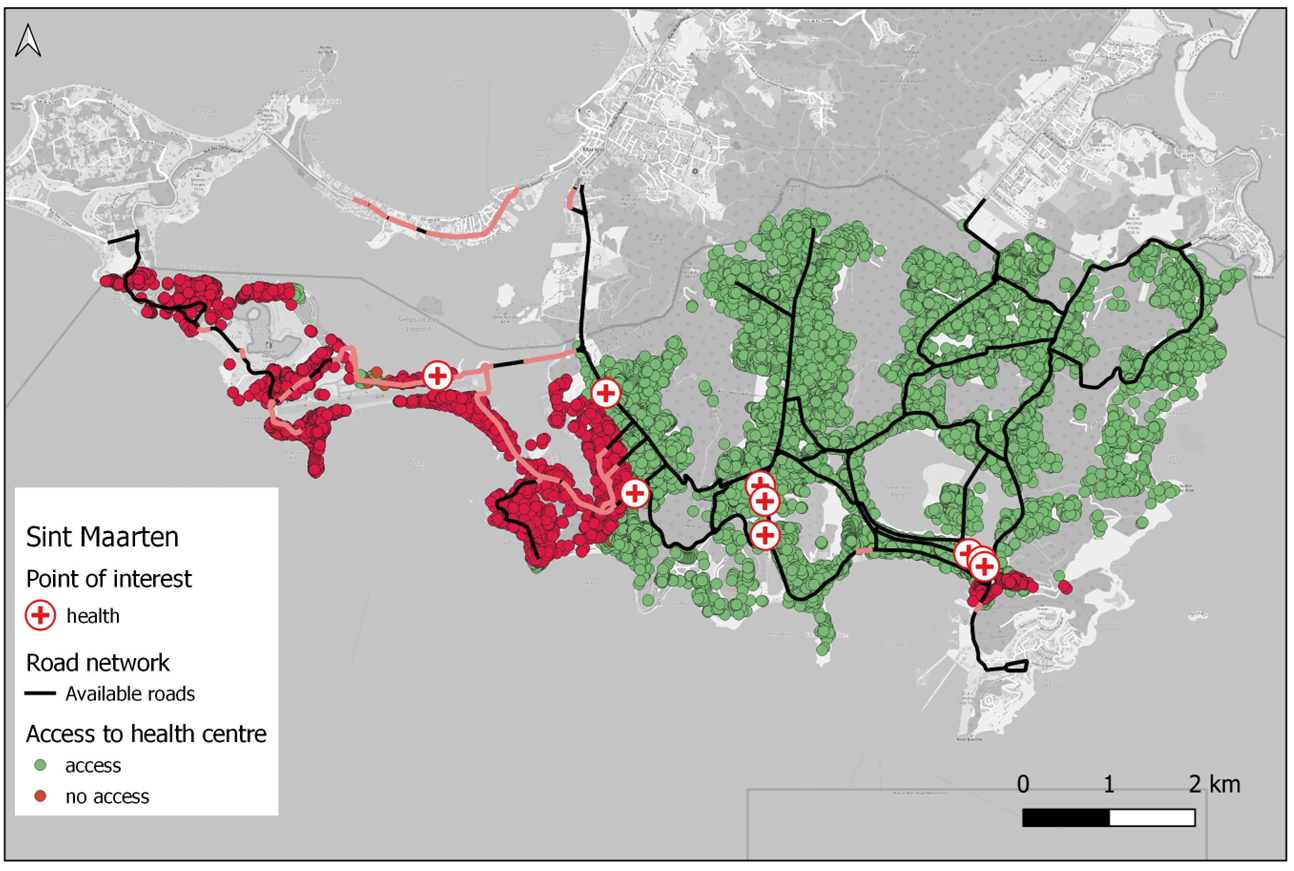

## Setting up the network.ini

1. Specify how you want to create the network or use the existing network you created in the ra2ce_basics notebook
2. Specify your hazard map. Or build on the folder you created in the hazard_overlay notebook

*Note: the hazard map needs to be in **.tif** format*

**Network.ini content**
<br>
<br>
> [project]<br>
name = #your_project_name <br>
<br>
[network]<br>
directed = False<br>
source = OSM download<br>
primary_file = None<br>
diversion_file = None<br>
file_id = rfid_c<br>
polygon = #your_polygon_extent.geojson<br>
network_type = drive<br>
road_types = motorway,motorway_link,primary,primary_link,secondary,secondary_link,tertiary,tertiary_link #specify the desired detail of road network <br>
save_gpkg = True<br>
<br>
[origins_destinations]<br>
origins = None<br>
destinations = None<br>
origins_names = None<br>
destinations_names = None<br>
id_name_origin_destination = None<br>
origin_count = None<br>                         
origin_out_fraction = 1<br>
category = None<br>
<br>
[hazard]<br>
hazard_map = #your_hazard_map_name.tif<br>
hazard_id = None<br>
hazard_field_name = waterdepth<br>
aggregate_wl = max<br>
hazard_crs = #specify crs<br>
<br>
*[cleanup]<br>
snapping_threshold = None<br>
segmentation_length = None<br>
merge_lines = True<br>
merge_on_id = False<br>
cut_at_intersections = False<br>*


#### Creating origins and destinations data

The user can use any point data as origins and/or destinations. The data need to be created before they can be used by RA2CE. Examples of origins and destinations can be from residentail homes (origins) to hospitals (destinations). It is possible to specify multiple destination categories (e.g. hospitals, schools, supermarkets, etc.). Bear in mind that the results of RA2CE are dependent on the quality of input data. 

*Tip: you can use WorldPop constrained data as an approximation of population count. OSM data can also be very useful to create origins/destinations from.*  

*If you want to first practice this with predefined data, check the origin_destination analysis notebook with predefined data*

Bear in mind that the origin data needs to be of a specific type (point shapefile/gpkg) and have a specific structure: it should hold an **ID-column** and there should be a field with the **origin_counts** (these can also be 0). The **origin_counts** attribute can hold any numeric value which will be used to count how many *units* (in this example, people) use a certain road segment to reach its destination, and per destination how many units can reach that destination.

*Note: Make sure your geometry is point and not multipoint.*

The same goes for the destinations. The destinations also needs to be a point shapefile/gpkg and needs an **ID-column**. It does not require an origin count column, however, destinations need a **category** column in which you specify the category of a destination (e.g., hospital, supermarket). 

The CRS of both origin and destination files is required to be in **WGS84** EPSG:4326.

After creating this data, the user needs to save the data in the **static/network** folder. 

#### Network.ini

Now, to tell RA2CE add the origins and destinations to the graph, the user needs to specify the file names in the network.ini.

*Notice how you can keep the [network] parameters the same as in the RA2CE Basics example and the hazard_overlay. RA2CE will automatically use the graph you have already created. If you want to create a new graph, create a new project folder. From there, RA2CE will first start to download the network, then assign origin destinations to the graph and if specfied do a hazard overlay.*

**Network.ini content**
<br>
<br>
> [project]<br>
name = your_project_name<br>
<br>
[network]<br>
directed = False<br>
source = OSM download<br>
primary_file = None<br>
diversion_file = None<br>
file_id = rfid_c<br>
polygon = your_project.geojson<br>
network_type = drive<br>
road_types = motorway,motorway_link,primary,primary_link,secondary,secondary_link,tertiary,tertiary_link #specify desired detail<br>
save_gpkg = True<br>
<br>
[origins_destinations]<br>
**origins = origins_worldpop_wgs84.shp** #put your own example name here<br>
**destinations = destinations_all_good_wgs84.shp** #put your own example name here <br>
**origins_names = A<br>
destinations_names = B<br>
id_name_origin_destination = OBJECTID** #put the name of the ID-column here <br>
**origin_count = POPULATION** #specify the name of the origin counts colum here<br>
**origin_out_fraction = 1** #this is the fraction to distribute the origin counts on the network <br>
**category = category** #specify the name of the destinations category column here<br>
<br>
[hazard]<br>
hazard_map = #your_hazard_map_name.tif<br>
hazard_id = None<br>
hazard_field_name = waterdepth<br>
aggregate_wl = max<br>
hazard_crs = #specify crs<br>
<br>
<br>
[cleanup]<br>
snapping_threshold = None<br>
segmentation_length = None<br>
merge_lines = True<br>
merge_on_id = False<br>
cut_at_intersections = False<br>*


Inspect your origin and destinations files

In [ ]:
#your code goes here


In [ ]:
#your code goes here


We now need to update our analysis initialisation files using the preferred OD-analysis (there are multiple). You can run multiple analyses at the same time by specifying them in your preferred order. All types of losses analyses can be found [here](https://github.com/Deltares/ra2ce/tree/master/analysis/losses).

## Optimal_route_origin_closest_destination

Now we will consider the **optimal_route_origin_closest_destination** analysis. This analysis finds from each origin location, the closest accessible non-impacted destination for each of the specified destination categories. 

#### Analyses.ini

Navigate to the folder on your local machine with which you want to perform the analysis, and change the analyses.ini accordingly.

With the **aggregate_wl** parameter, the user can choose which type of aggregation of the hazard values on the road segment (max, mean, min) the analysis should consider. The **threshold** is the hazard intensity which determines network disruption, in this case it is set to 0.5, which relates to 0.5 m of water depth on the road segment in the case of flooding. The analysis considers **distance** as a measure for finding the optimal routes. With the parameter **calculate_route_without_disruption** set to True, RA2CE will calculate the optimal OD routes with hazard disruption *and without*. Finally, with the parameters **save_gpkg** and **save_csv** the user can choose to save or not save resulting output shapefiles/gpkg (we are in a transition from shp to gpkg)/csvs.

**Analysis.ini content**
<br>
<br>
> [project] <br>
name = your_project_name <br>
<br>
[analysis1]<br>
name = multi-link origin closest destination<br>
analysis = multi_link_origin_closest_destination<br>
aggregate_wl = max<br>
threshold = 0.5<br>
weighing = distance<br>
calculate_route_without_disruption = True<br>
save_gpkg = True<br>
save_csv = True<br>
<br>

## Run RA2CE

Set the paths to the initialization files and check if the files exist.

In [ ]:
root_dir = Path(r' ') # set path to your RA2CE folder which holds the input data and a pre-defined network

_network_ini_name = "network.ini" # set the name for the network.ini settings file
_analyses_ini_name = "analyses.ini" # set the name for the analysis.ini

network_ini = root_dir / _network_ini_name # set path to network.ini
analyses_ini = root_dir / _analyses_ini_name # set path to analysis.ini

assert network_ini.is_file() # check whether the network.ini file exists
assert analyses_ini.is_file() # check whether the analysis.ini file exists

Run RA2CE. Notice the information RA2CE gives you on the names of the Destinations, each category gets a number.

In [ ]:
handler = Ra2ceHandler(network=network_ini, analysis=analyses_ini)
handler.configure()
handler.run_analysis()

## Inspecting results

Inspect your results. You can check the origin_destination_analysis notebook with predefined data for inspiration!

In [ ]:
#your code goes here